In [1]:
import os
from tensorflow import keras
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


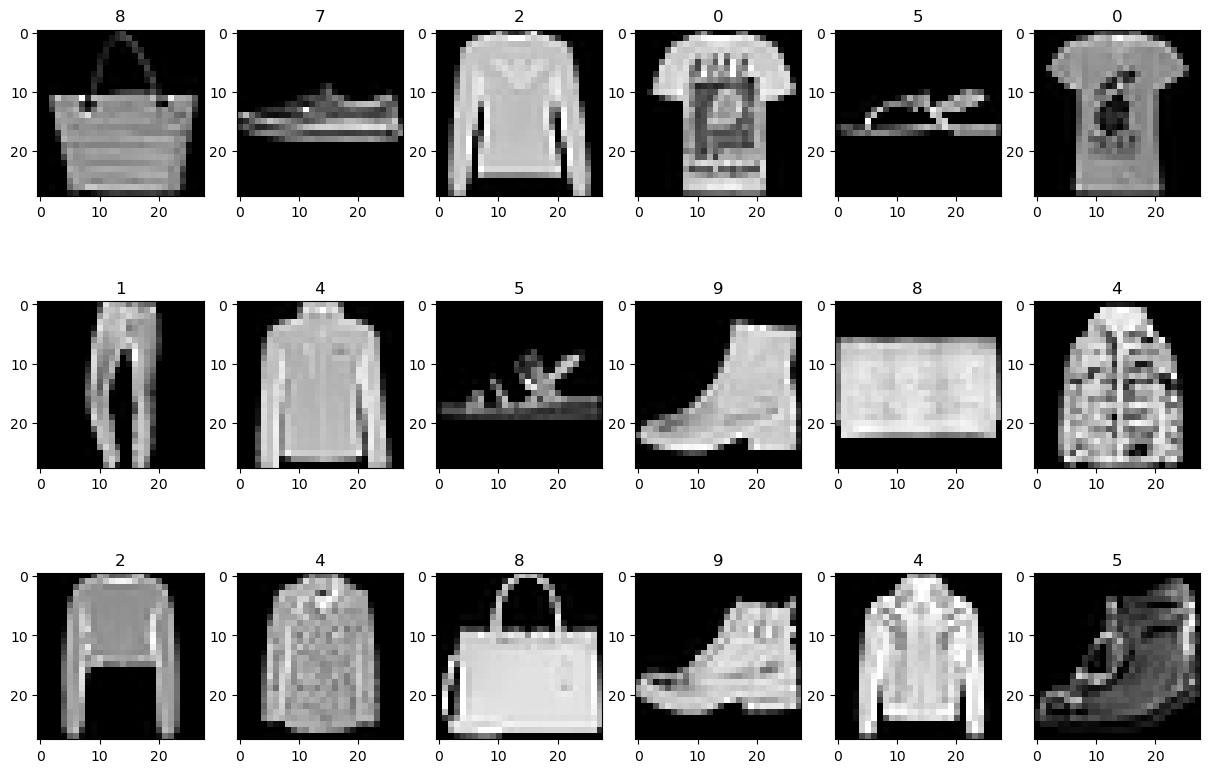

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

In [4]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [5]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [6]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 19s 20ms/step - loss: 0.3909 - accuracy: 0.8635 - val_loss: 0.3309 - val_accuracy: 0.8823
Epoch 2/50
938/938 [==============================] - 19s 20ms/step - loss: 0.2652 - accuracy: 0.9057 - val_loss: 0.2939 - val_accuracy: 0.8960
Epoch 3/50
938/938 [==============================] - 19s 20ms/step - loss: 0.2230 - accuracy: 0.9190 - val_loss: 0.2967 - val_accuracy: 0.8955
Epoch 4/50
938/938 [==============================] - 19s 20ms/step - loss: 0.1906 - accuracy: 0.9305 - val_loss: 0.3073 - val_accuracy: 0.8975
Epoch 5/50
938/938 [==============================] - 19s 21ms/step - loss: 0.1662 - accuracy: 0.9398 - val_loss: 0.3141 - val_accuracy: 0.9003
Epoch 6/50
938/938 [==============================] - 20s 21ms/step - loss: 0.1473 - accuracy: 0.9468 - val_loss: 0.3166 - val_accuracy: 0.9028
Epoch 7/50
938/938 [==============================] - 19s 21ms/step - loss: 0.1305 - accuracy: 0.9526 - val_loss: 0.3373 - val_accuracy:

Train Acc      0.9951833486557007
Validation Acc 0.8866000175476074


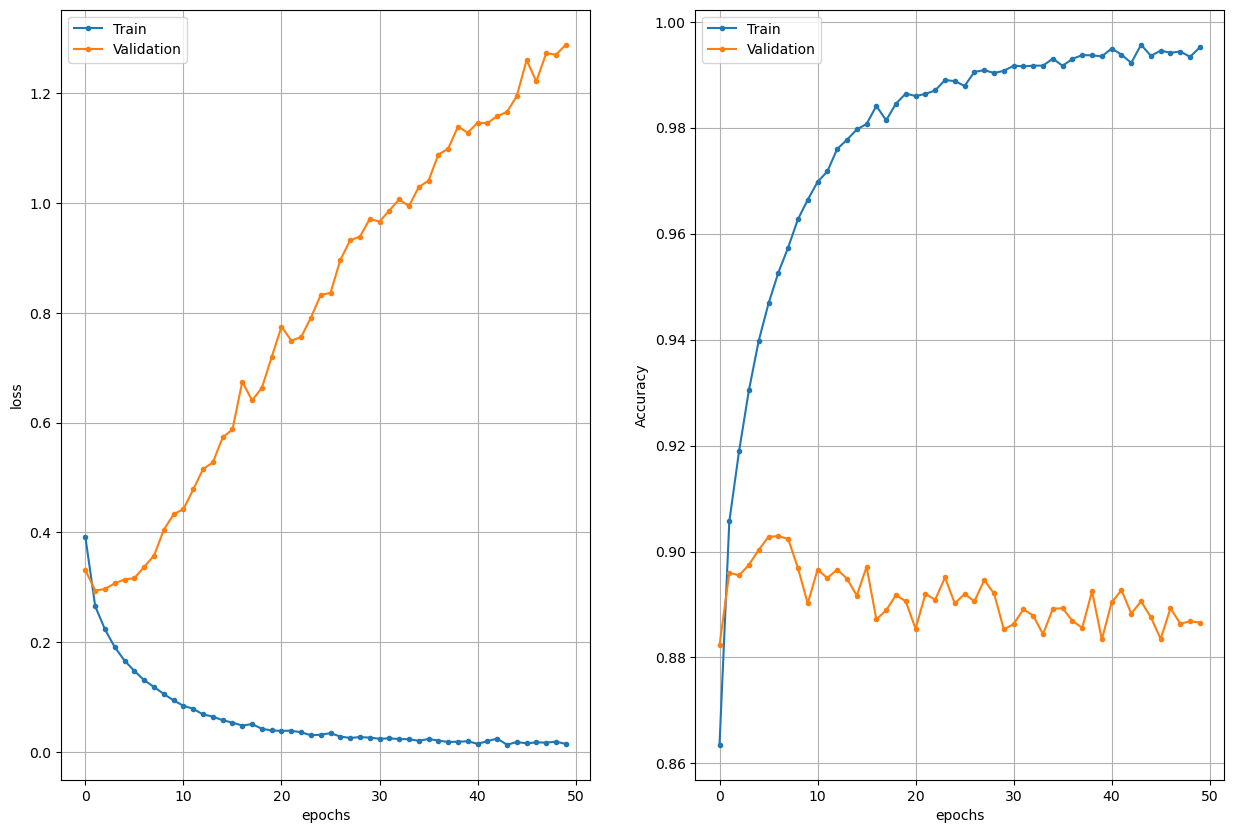

In [7]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

In [22]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust
# I've made the network as small and simple as I could.
# To make the validation accuracy higher than 91%, lowering the amount of neurons and adding MaxPooling2D and Dropout was enough
inputs = Input(shape=(28, 28, 1))
net = Conv2D(40, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Flatten()(net)
net = Dense(20)(net)
net = Dropout(0.3)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 40)        400       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 40)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 40)        0         
                                                                 
 flatten_4 (Flatten)         (None, 7840)              0         
                                                                 
 dense_8 (Dense)             (None, 20)                156820    
                                                           

In [24]:
# Train the network
# The amount of epochs and batch_size are lowered too.
epochs = 15
batch_size = 150

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/15
400/400 [==============================] - 22s 54ms/step - loss: 0.2977 - accuracy: 0.8990 - val_loss: 0.3006 - val_accuracy: 0.8917
Epoch 2/15
400/400 [==============================] - 18s 46ms/step - loss: 0.2788 - accuracy: 0.9045 - val_loss: 0.2827 - val_accuracy: 0.8981
Epoch 3/15
400/400 [==============================] - 20s 51ms/step - loss: 0.2686 - accuracy: 0.9056 - val_loss: 0.2804 - val_accuracy: 0.9001
Epoch 4/15
400/400 [==============================] - 16s 40ms/step - loss: 0.2596 - accuracy: 0.9102 - val_loss: 0.2801 - val_accuracy: 0.8986
Epoch 5/15
400/400 [==============================] - 19s 49ms/step - loss: 0.2602 - accuracy: 0.9098 - val_loss: 0.2699 - val_accuracy: 0.9052
Epoch 6/15
400/400 [==============================] - 16s 40ms/step - loss: 0.2634 - accuracy: 0.9071 - val_loss: 0.2760 - val_accuracy: 0.8975
Epoch 7/15
400/400 [==============================] - 21s 53ms/step - loss: 0.2574 - accuracy: 0.9090 - val_loss: 0.2736 - val_accuracy:

Train Acc      0.9214000105857849
Validation Acc 0.9139999747276306


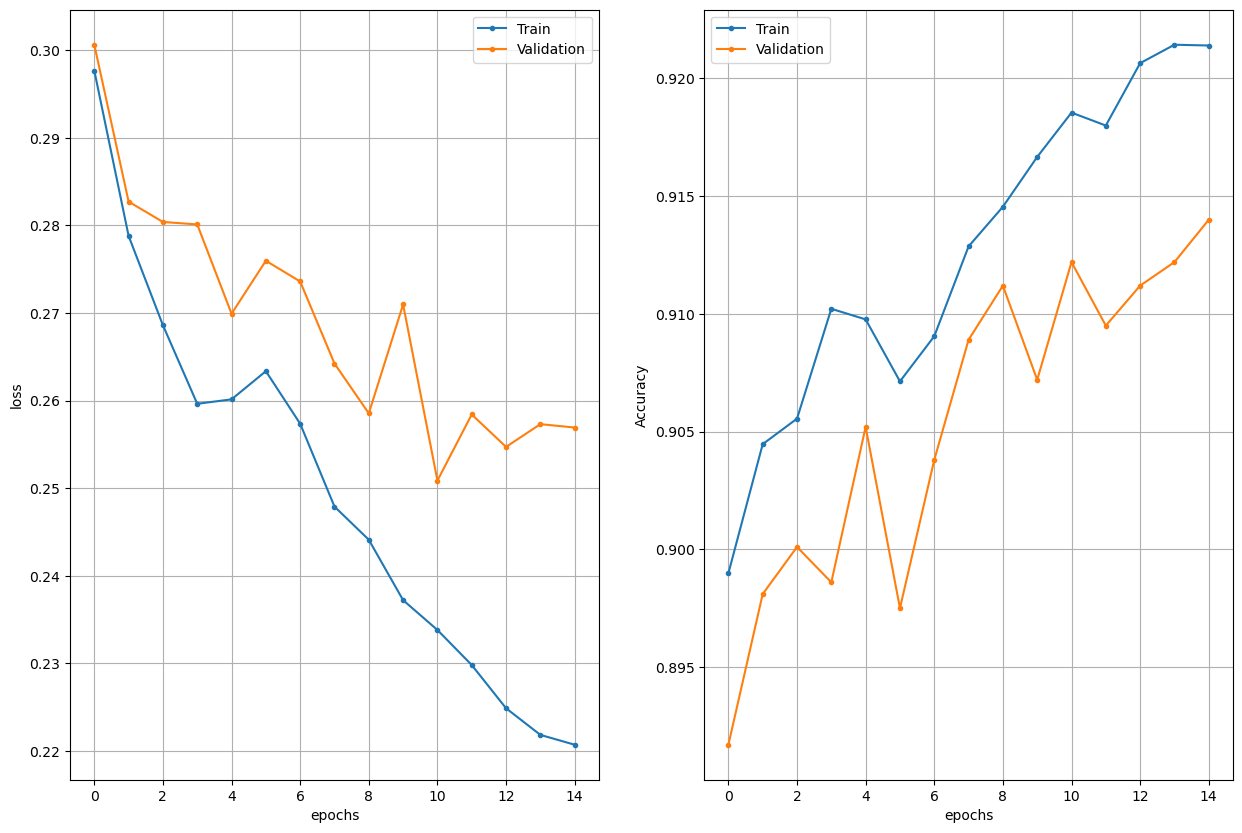

In [25]:
# Show the results
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

In [ ]:
# Questions
# 1) Lowered the amount of neurons, epochs and batch_size. Added MaxPooling2D and Dropout.
# 2) Making batch_size big, the network performs worse with bigger values.